In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [119]:
data=pd.read_csv("D:\\end_to_end\\ml\\regression\\car_price_predict\\data\\CarPrice_Assignment.csv")
data.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [120]:
pd.set_option("display.max_columns", None)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data Dictionary

1. **Car_ID**: Unique identifier for each observation (Integer)
2. **Symboling**: Assigned insurance risk rating; a value of +3 indicates high risk, while -3 indicates low risk (Categorical)
3. **carCompany**: Name of the car manufacturer (Categorical)
4. **fueltype**: Type of fuel used by the car, such as gas or diesel (Categorical)
5. **aspiration**: Type of aspiration used in the car, such as turbo or standard (Categorical)
6. **doornumber**: Number of doors on the car (Categorical)
7. **carbody**: Style of the car body, like sedan, hatchback, etc. (Categorical)
8. **drivewheel**: Type of drive wheel configuration, such as front-wheel drive, rear-wheel drive, or all-wheel drive (Categorical)
9. **enginelocation**: Location of the car's engine, such as front or rear (Categorical)
10. **wheelbase**: Distance between the front and rear axles of the car (Numeric)
11. **carlength**: Total length of the car (Numeric)
12. **carwidth**: Total width of the car (Numeric)
13. **carheight**: Total height of the car (Numeric)
14. **curbweight**: Weight of the car without passengers or baggage (Numeric)
15. **enginetype**: Type of engine used in the car, like DOHC, SOHC, etc. (Categorical)
16. **cylindernumber**: Number of cylinders in the engine (Categorical)
17. **enginesize**: Displacement of the engine, often measured in cubic inches or liters (Numeric)
18. **fuelsystem**: Type of fuel system, such as MPFI, carburetor, etc. (Categorical)
19. **boreratio**: Ratio of the bore (diameter) of the cylinder (Numeric)
20. **stroke**: Length of the stroke within the engine cylinder (Numeric)
21. **compressionratio**: Ratio of the volume of the combustion chamber from its largest capacity to its smallest capacity (Numeric)
22. **horsepower**: Power output of the engine, often measured in horsepower (Numeric)
23. **peakrpm**: Maximum revolutions per minute (RPM) of the engine (Numeric)
24. **citympg**: Fuel efficiency in city driving conditions, measured in miles per gallon (Numeric)
25. **highwaympg**: Fuel efficiency on highways, measured in miles per gallon (Numeric)
26. **price (Dependent variable)**: Market price of the car (Numeric)


## 1.understand the data

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [122]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 2. Data Cleaning

In [123]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### there is no missing value in the dataset


In [124]:
data.duplicated().sum()

0

### there is no duplicates in the data

In [125]:
num_fea=data.select_dtypes(exclude="object")
cat_fea=data.select_dtypes(include="object")

data[]

In [126]:
data['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

### data type corrections

In [127]:
cylinder_mapping = {
    'four': 4,
    'six': 6,
    'five': 5,
    'eight': 8,
    'two': 2,
    'three': 3,
    'twelve': 12
}
data['cylindernumber']=data["cylindernumber"].map(cylinder_mapping)

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [129]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Understand Data Distribution

In [131]:

for i in cat_fea:
    nun_con=data[i].nunique()
    print(i,nun_con)

CarName 147
fueltype 2
aspiration 2
doornumber 2
carbody 5
drivewheel 3
enginelocation 2
enginetype 7
cylindernumber 7
fuelsystem 8


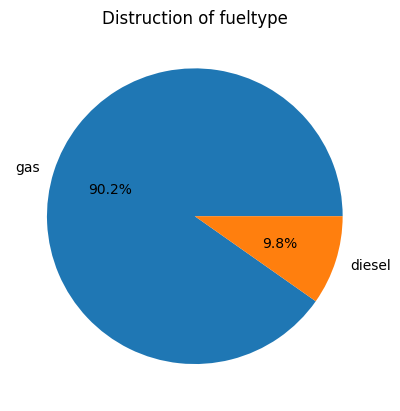

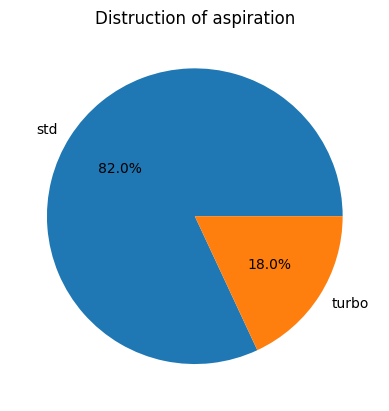

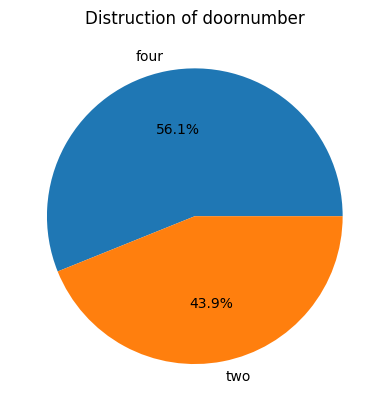

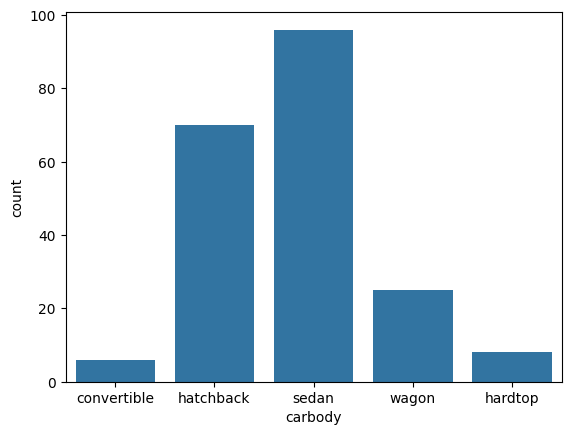

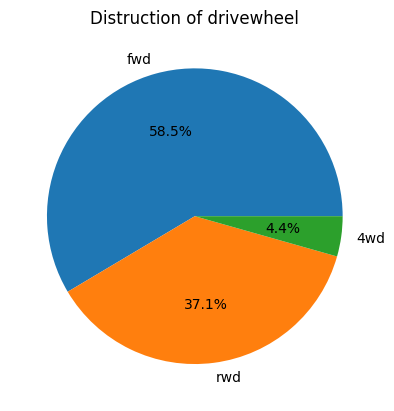

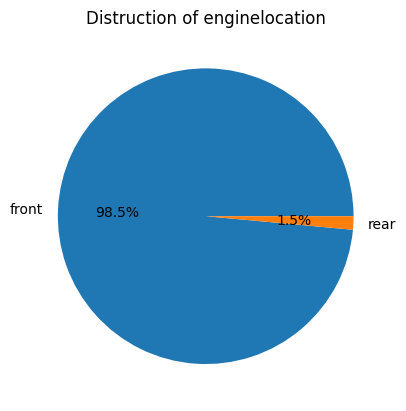

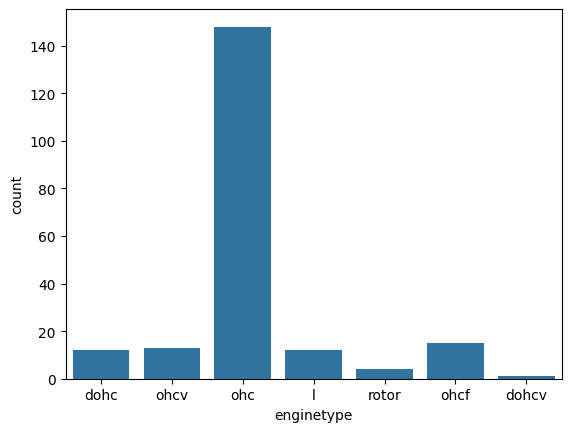

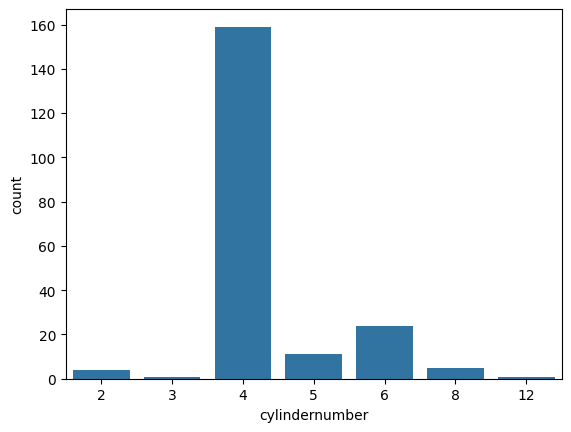

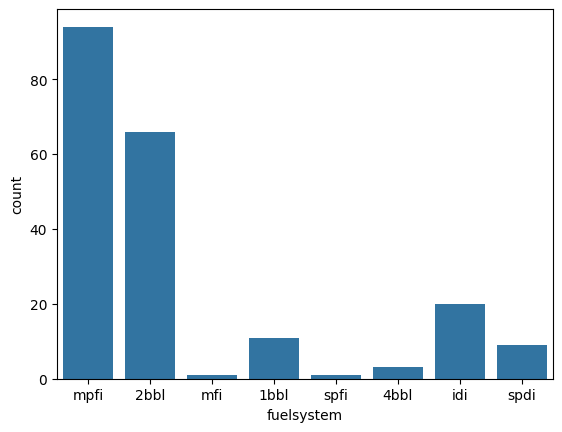

In [132]:

for fea in cat_fea:
    if data[fea].nunique() <4:
        if fea!="CarName":
            cat_count=data[fea].value_counts()
            plt.pie(cat_count,labels=cat_count.index,autopct='%1.1f%%')
            plt.title(f"Distruction of {fea}")
            plt.show()
    else:
        if fea!="CarName":
            sns.countplot(data=data,x=data[fea])
            plt.show()

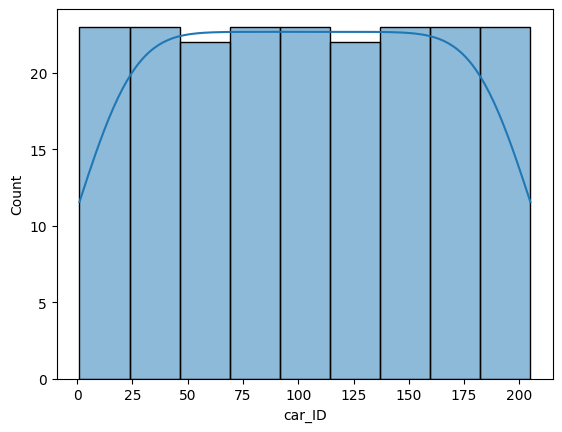

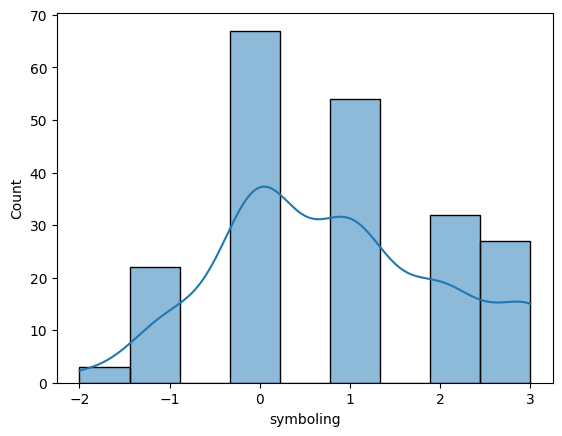

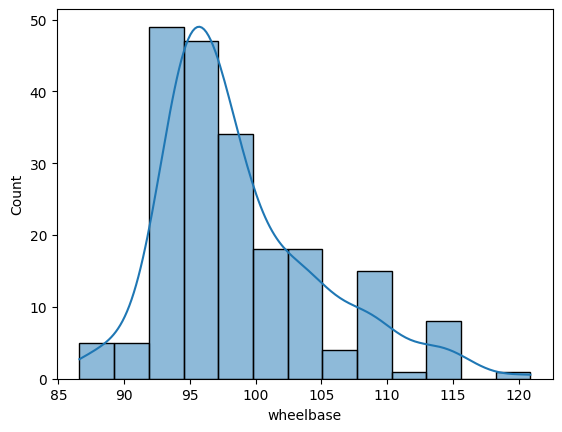

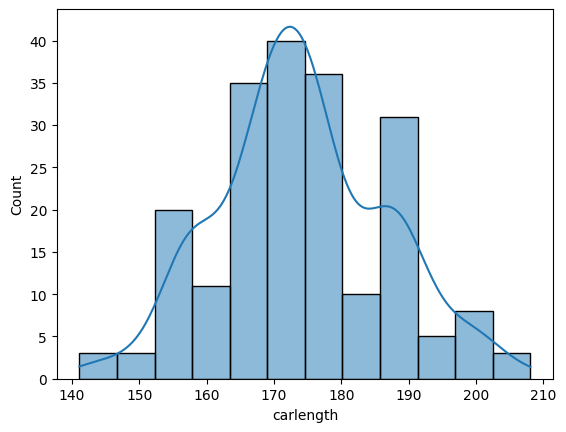

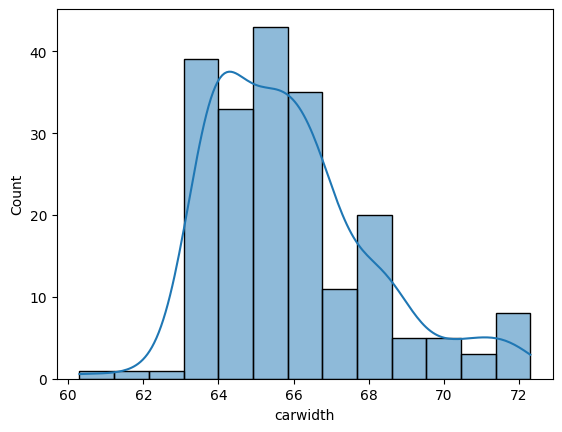

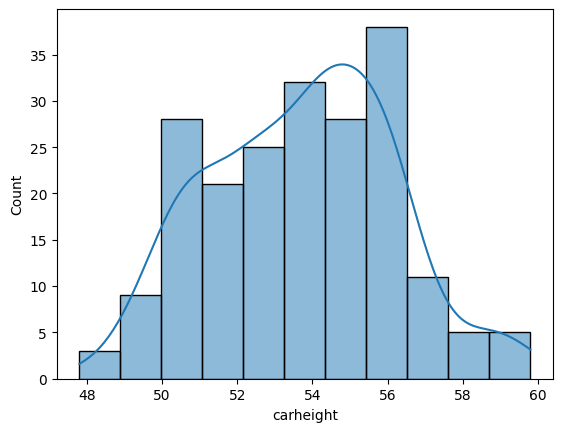

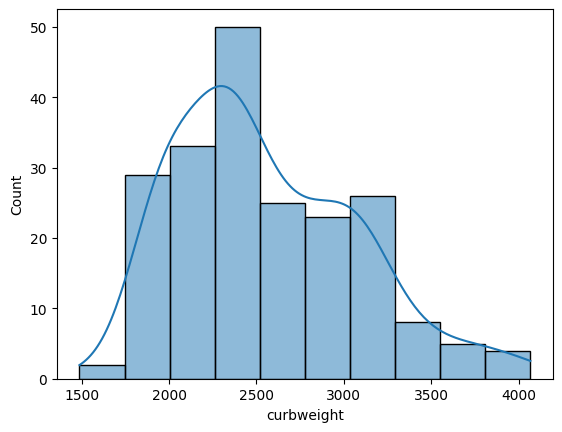

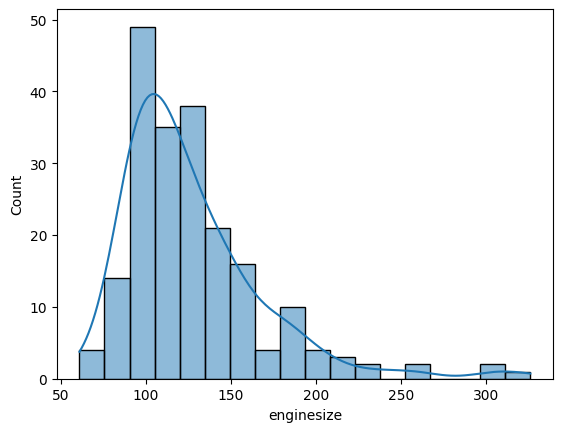

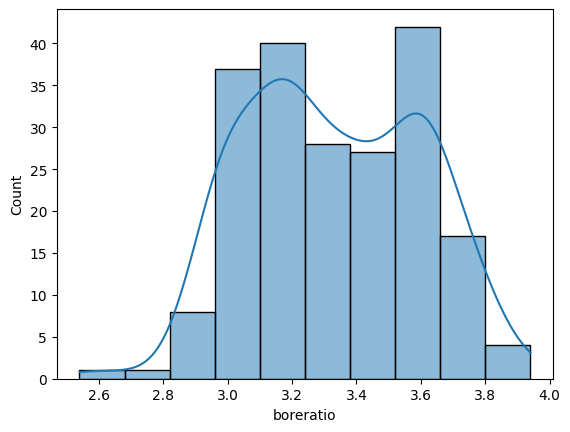

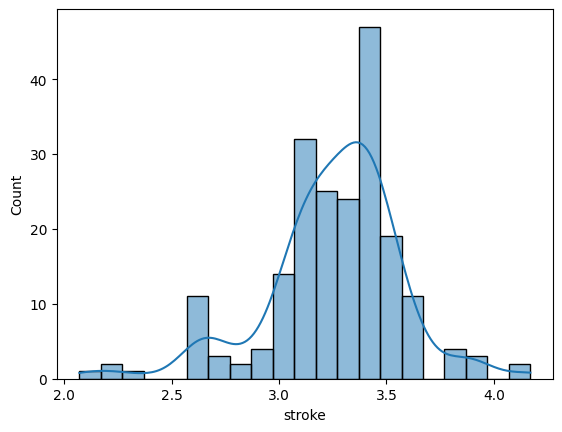

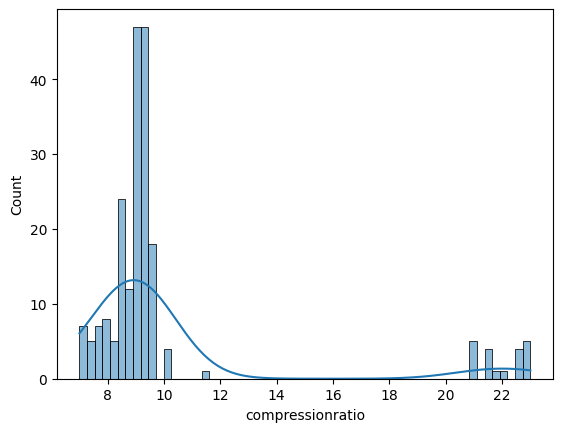

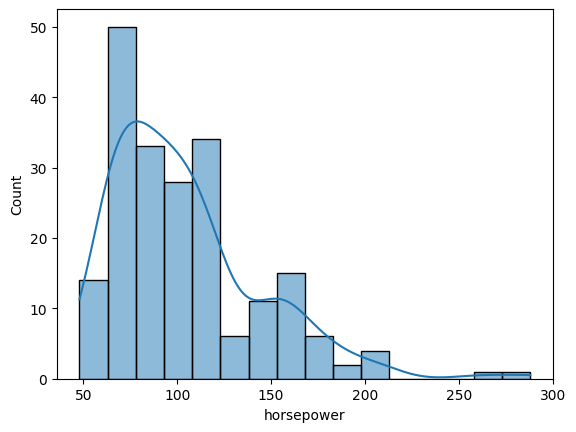

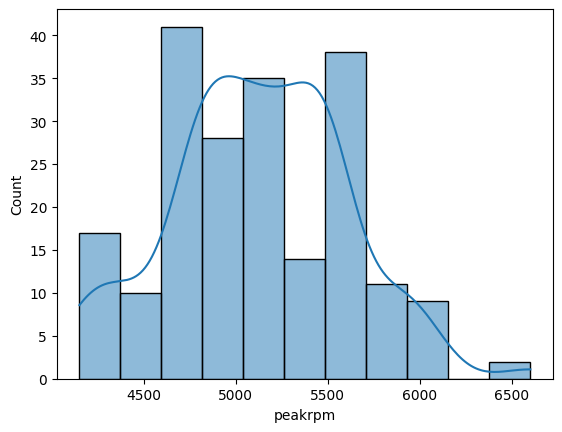

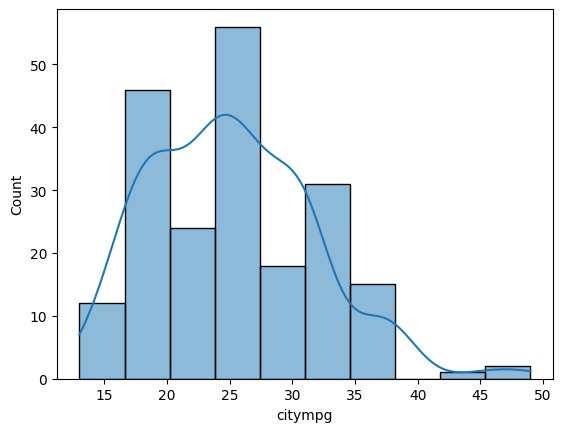

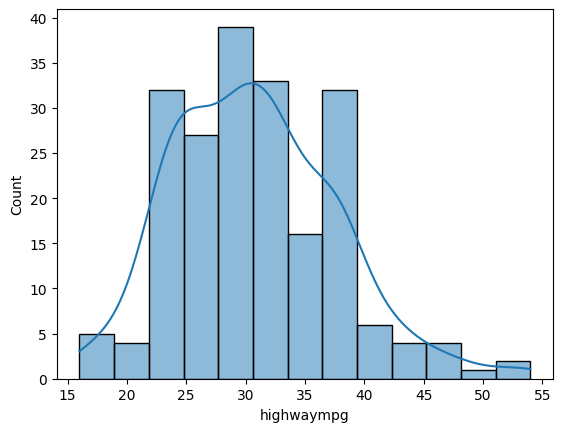

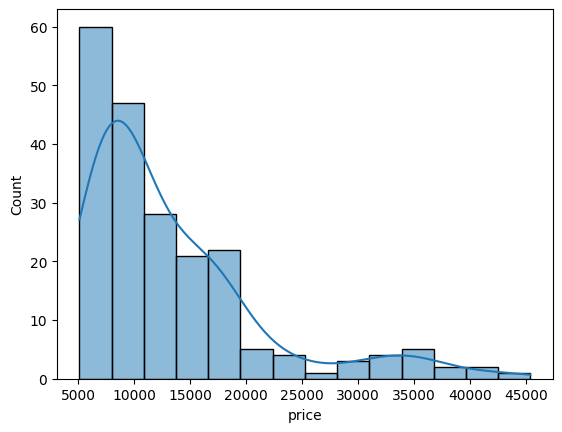

In [133]:
for fea in num_fea:
    sns.histplot(data=data,x=data[fea],kde=True)
    plt.show()

#### there is no normal distruction(bull curve)

## outlier dection 

In [134]:
# Check each numeric column for invalid values
for column in data.select_dtypes(exclude="object").columns:
    print(f"Column: {column}")
    print(data[column].isna().sum(), "missing values")  # Count of NaNs


Column: car_ID
0 missing values
Column: symboling
0 missing values
Column: wheelbase
0 missing values
Column: carlength
0 missing values
Column: carwidth
0 missing values
Column: carheight
0 missing values
Column: curbweight
0 missing values
Column: cylindernumber
0 missing values
Column: enginesize
0 missing values
Column: boreratio
0 missing values
Column: stroke
0 missing values
Column: compressionratio
0 missing values
Column: horsepower
0 missing values
Column: peakrpm
0 missing values
Column: citympg
0 missing values
Column: highwaympg
0 missing values
Column: price
0 missing values


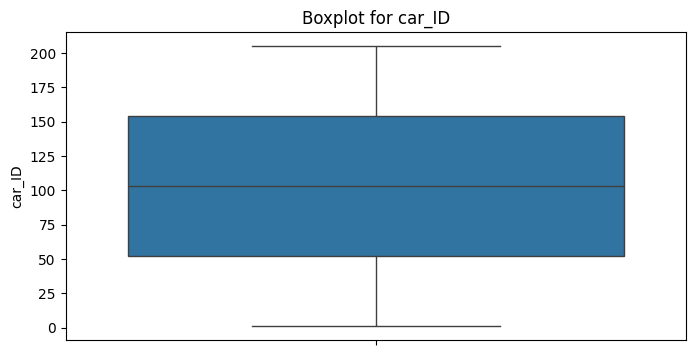

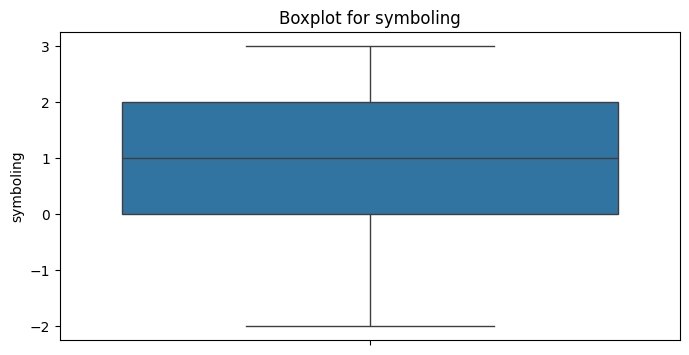

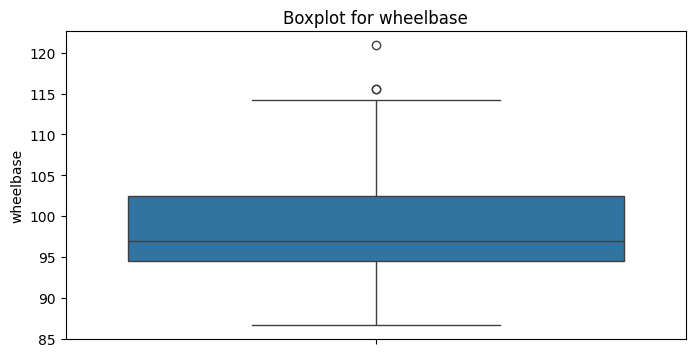

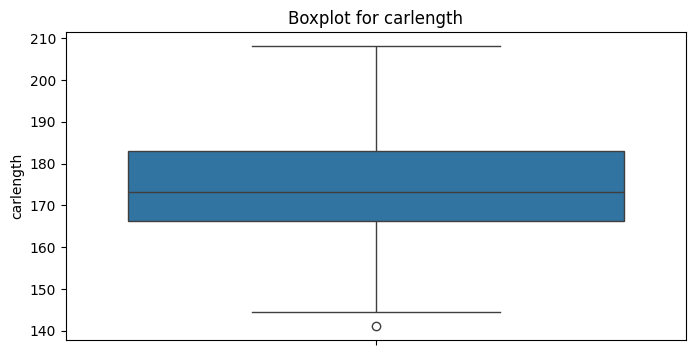

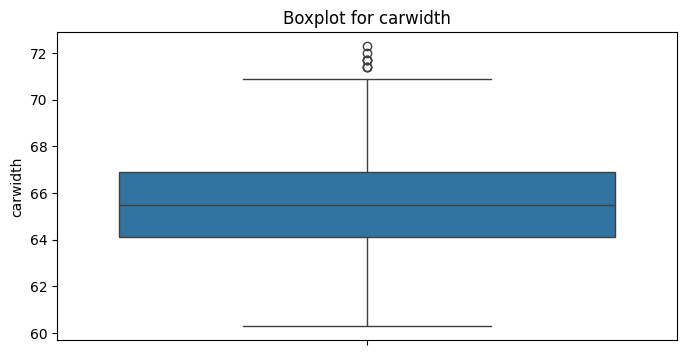

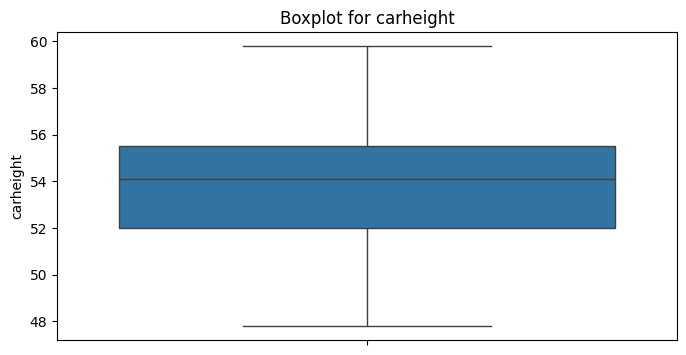

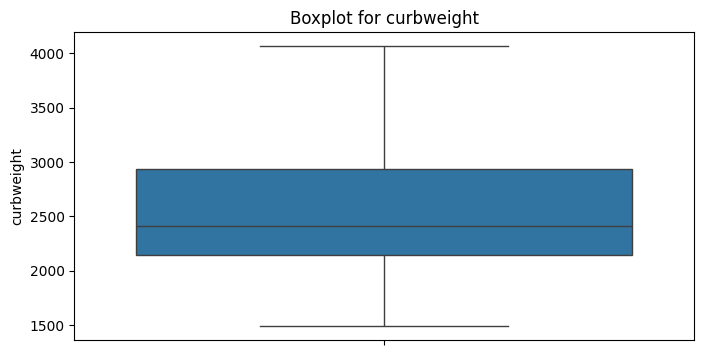

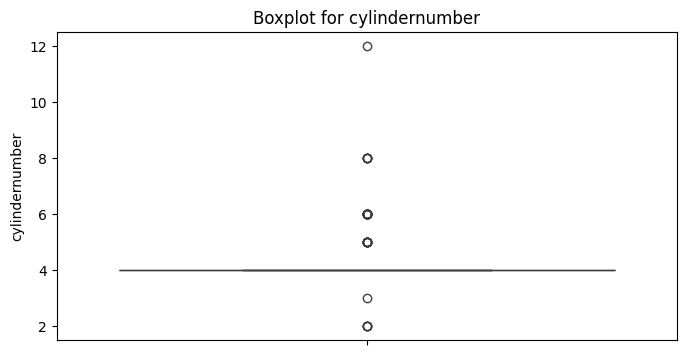

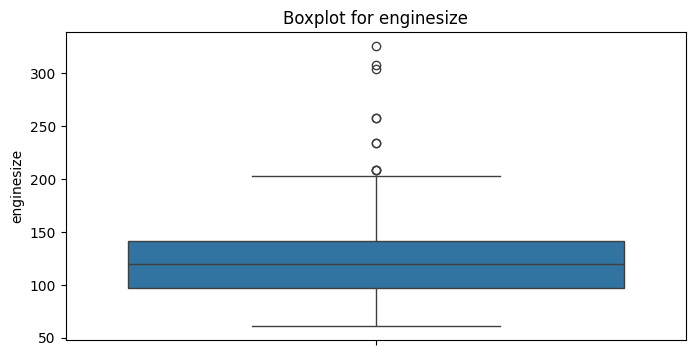

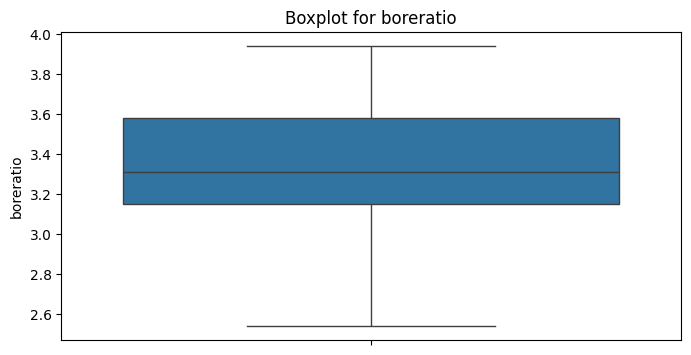

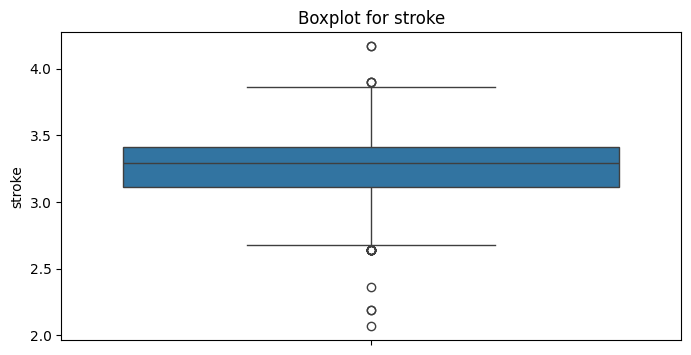

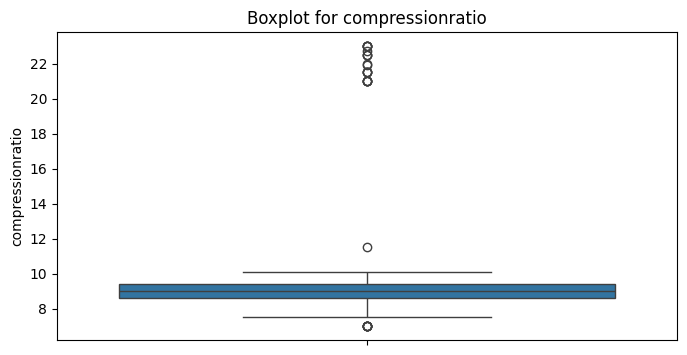

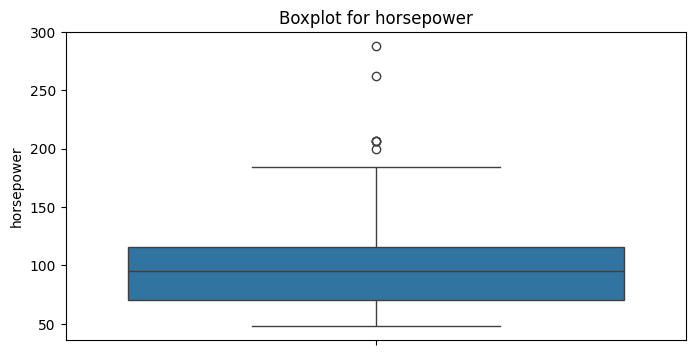

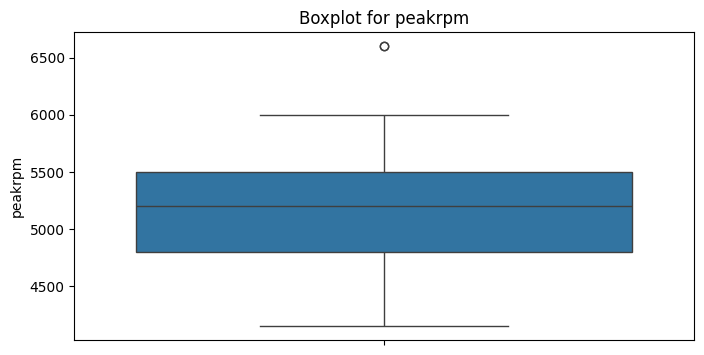

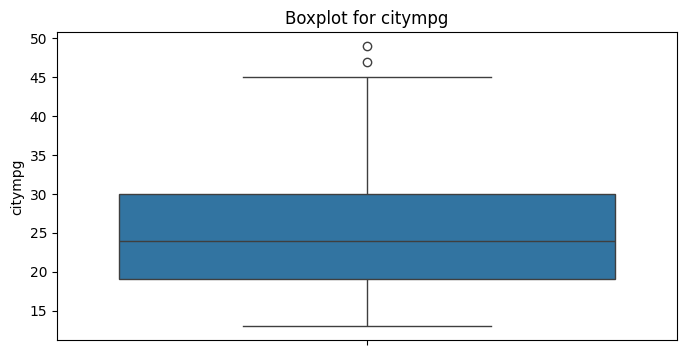

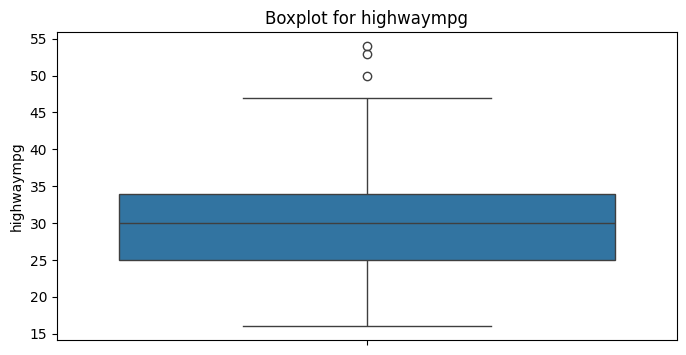

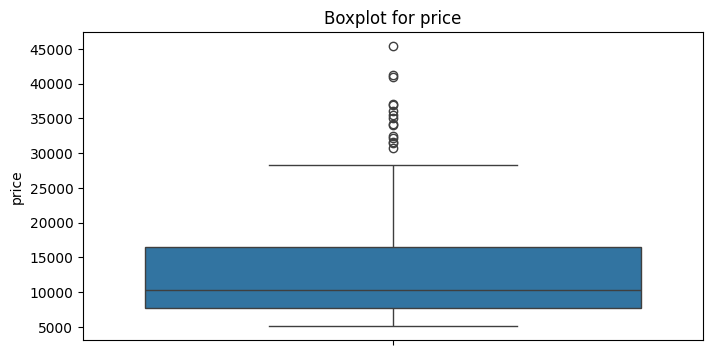

In [135]:
for i in data.select_dtypes(exclude="object").columns:
    plt.figure(figsize=(8, 4))  
    sns.boxplot(data=data, y=data[i])  
    plt.title(f'Boxplot for {i}')  
    plt.show() 

## CORELATION ANALYSIS

<Axes: >

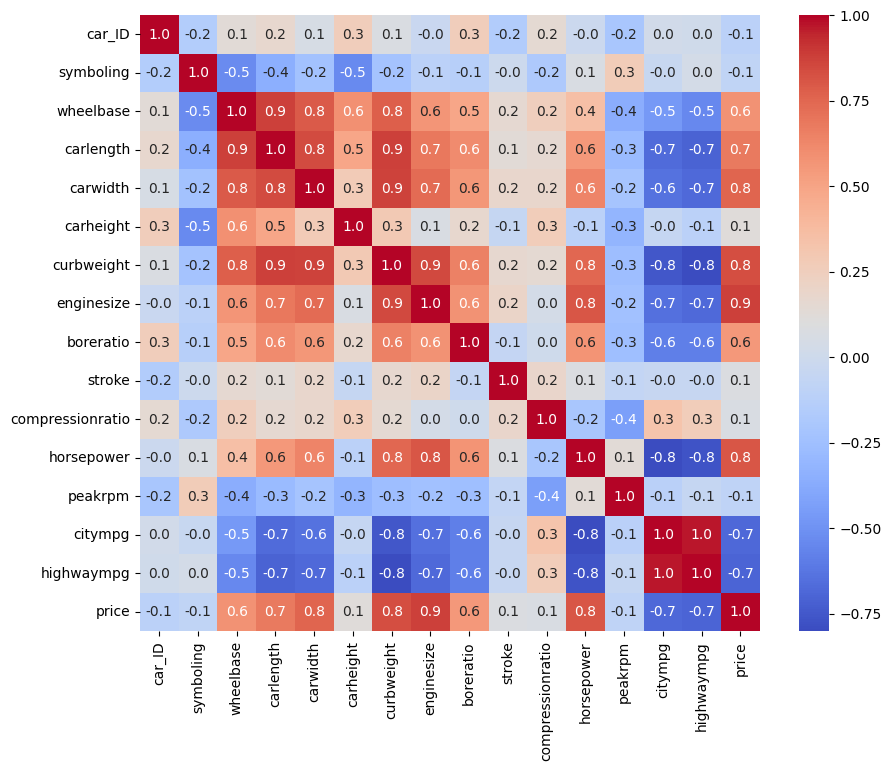

In [136]:
relation=num_fea.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=relation,annot=True,fmt=".1f",cmap="coolwarm")

In [137]:
df = pd.DataFrame({
    'Order_ID': [1, 2, 2, 3, 4],
    'Customer': ['Alice', 'Bob', 'Bob', 'Charlie', 'David'],
    'Amount': [100, 200, 200, 300, 400]
})


